In [3]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import display
from sklearn import metrics

In [4]:
def data_treatment(file):

    data = pd.read_csv(file, header=0)
    #print(file)
    print(f"{file} data: {data}\n\n")
    if(file=='train.csv'):

        data.drop('Id',axis=1,inplace=True) 
    
        #obj_data = train_data.select_dtypes(include=['object']).copy()
        #print(obj_train_data['Program'].value_counts())
    
        enconde = {"Program": {"Informatics": 0, "Nursing": 1, "Management": 2, "Biology": 3}}
        data = data.replace(enconde)
        #print(train_data.head())


        #split treino em x_train e y_train
        
        y_data = data[['Failure']].copy()
        #print(y_data)

        data.drop('Failure',axis=1,inplace=True)
        x_data = data.copy()
        #print(x_data)

        return x_data,y_data
    
    else:
        
        save = data['Id'].copy()
        data.drop('Id',axis=1,inplace=True) 
        enconde = {"Program": {"Informatics": 0, "Nursing": 1, "Management": 2, "Biology": 3}}
        data = data.replace(enconde)

        return data,save
    
x_train,y_train = data_treatment('train.csv')
x_test,id_column = data_treatment('test.csv')

print(f"X_TRAIN: \n\n{x_train}\n\nY_TRAIN: \n\n{y_train}\n\n")
print(f"X_TEST: \n\n{x_test}\n\nID_COLUMN: \n\n{id_column}\n\n")

train.csv data:              Id      Program  Y0s1_enrol  Y0s2_enrol  Y1s1_enrol  \
0     131386709   Management        46.0        30.0        36.5   
1     111354305      Nursing        30.0        24.0        30.0   
2     111345828      Nursing        30.0        40.0        26.0   
3     131393682      Biology         0.0         6.0        20.0   
4     131383677  Informatics        41.0        36.0        36.0   
...         ...          ...         ...         ...         ...   
1841  131386328      Nursing        30.0        30.0        30.0   
1842  131395023   Management         6.0        12.0         6.0   
1843  111345905      Nursing        30.0        30.0        26.0   
1844  131384002   Management        36.0         0.0        30.0   
1845  131384859      Nursing        36.0         0.0        30.0   

      Y1s1_complete  Y1s1_grade  Y1s2_enrol  Y1s2_complete  Y1s2_grade  ...  \
0              36.5      11.452        36.0           36.0      13.236  ...   
1        

n_estimators: 1, train_accuracy: 0.7291440953412784 ,test_accuracy: 0.7291421856639249
n_estimators: 20, train_accuracy: 0.9236186348862405 ,test_accuracy: 0.9165716803760283
n_estimators: 39, train_accuracy: 0.9404117009750813 ,test_accuracy: 0.934994124559342
n_estimators: 58, train_accuracy: 0.9539544962080173 ,test_accuracy: 0.9425763807285547
n_estimators: 77, train_accuracy: 0.957204767063922 ,test_accuracy: 0.9436633372502937
n_estimators: 96, train_accuracy: 0.9604550379198267 ,test_accuracy: 0.9479876615746182
n_estimators: 115, train_accuracy: 0.962080173347779 ,test_accuracy: 0.9463631022326675
n_estimators: 134, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.9469153936545242
n_estimators: 153, train_accuracy: 0.9680390032502708 ,test_accuracy: 0.9474618096357228
n_estimators: 172, train_accuracy: 0.9702058504875406 ,test_accuracy: 0.9441980023501764
n_estimators: 191, train_accuracy: 0.9696641386782232 ,test_accuracy: 0.9452790834312573


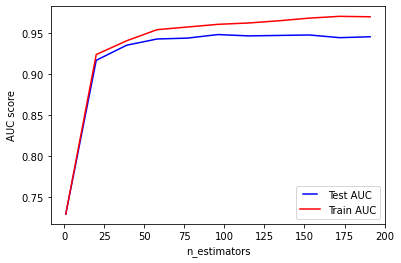

In [85]:
min_estimators = 1
max_estimators = 200
inc_estimators = int((max_estimators-min_estimators)/10)
n_estimators = range(min_estimators,max_estimators+1,inc_estimators)
vali_results = []
train_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator,learning_rate=0.11, max_depth=3, min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"n_estimators: {estimator}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_estimators, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('n_estimators')
plt.show()

learning_rate: 0.01, train_accuracy: 0.9209100758396533 ,test_accuracy: 0.9138689776733255
learning_rate: 0.11, train_accuracy: 0.9653304442036836 ,test_accuracy: 0.9463660399529965
learning_rate: 0.21000000000000002, train_accuracy: 0.9734561213434453 ,test_accuracy: 0.9452820211515863
learning_rate: 0.31000000000000005, train_accuracy: 0.9788732394366197 ,test_accuracy: 0.9469007050528789
learning_rate: 0.41000000000000003, train_accuracy: 0.9783315276273022 ,test_accuracy: 0.9425763807285547
learning_rate: 0.51, train_accuracy: 0.9880823401950163 ,test_accuracy: 0.9431081081081081
learning_rate: 0.6100000000000001, train_accuracy: 0.9891657638136512 ,test_accuracy: 0.934994124559342
learning_rate: 0.7100000000000001, train_accuracy: 0.9907908992416035 ,test_accuracy: 0.9050998824911869
learning_rate: 0.81, train_accuracy: 0.8114842903575298 ,test_accuracy: 0.9420475910693303
learning_rate: 0.91, train_accuracy: 0.9962080173347779 ,test_accuracy: 0.9295828437132785
learning_rate: 1.0

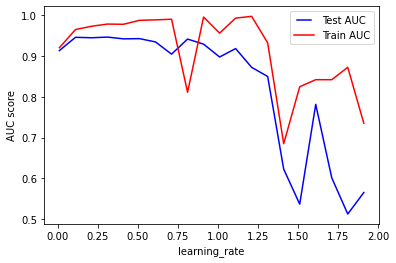

In [86]:
min_learning = 0.01
max_learning = 1
inc_learning = int((max_learning-min_learning)/10)
n_learning = np.arange(min_learning,max_learning+1,0.10)
vali_results = []
train_results = []

for learning in n_learning:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=learning, max_depth=3, min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"learning_rate: {learning}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_learning, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_learning, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('learning_rate')
plt.show()

max_depth: 1, train_accuracy: 0.9496208017334777 ,test_accuracy: 0.9425881316098709
max_depth: 2, train_accuracy: 0.9615384615384616 ,test_accuracy: 0.946909518213866
max_depth: 3, train_accuracy: 0.9631635969664138 ,test_accuracy: 0.9463719153936545
max_depth: 4, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.9474500587544066
max_depth: 5, train_accuracy: 0.9680390032502708 ,test_accuracy: 0.945828437132785
max_depth: 6, train_accuracy: 0.9664138678223185 ,test_accuracy: 0.9474500587544066
max_depth: 7, train_accuracy: 0.9669555796316359 ,test_accuracy: 0.9469095182138659
max_depth: 8, train_accuracy: 0.9669555796316359 ,test_accuracy: 0.9479964747356051
max_depth: 9, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.9469153936545242
max_depth: 10, train_accuracy: 0.9685807150595883 ,test_accuracy: 0.9474500587544066


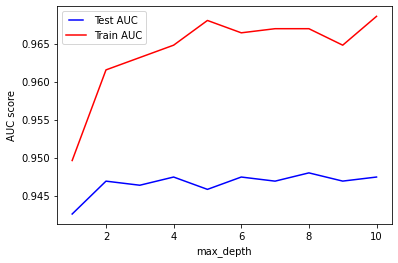

In [87]:
min_depth = 1
max_depth = 10
inc_depth = int((max_depth-min_depth)/10)
n_depth = np.arange(min_depth,max_depth+1,1)
vali_results = []
train_results = []

for depth in n_depth:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=float(depth), min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"max_depth: {depth}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_depth, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_depth, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('max_depth')
plt.show()

min_samples_split: 0.1, train_accuracy: 0.9994582881906826 ,test_accuracy: 0.9382403055229143
min_samples_split: 0.2, train_accuracy: 0.9978331527627302 ,test_accuracy: 0.9447356051703878
min_samples_split: 0.30000000000000004, train_accuracy: 0.9918743228602384 ,test_accuracy: 0.9458225616921269
min_samples_split: 0.4, train_accuracy: 0.9837486457204767 ,test_accuracy: 0.9469007050528792
min_samples_split: 0.5, train_accuracy: 0.9756229685807151 ,test_accuracy: 0.9469124559341952
min_samples_split: 0.6, train_accuracy: 0.9696641386782232 ,test_accuracy: 0.9485311398354878
min_samples_split: 0.7000000000000001, train_accuracy: 0.9685807150595883 ,test_accuracy: 0.946906580493537
min_samples_split: 0.8, train_accuracy: 0.9615384615384616 ,test_accuracy: 0.9479994124559342
min_samples_split: 0.9, train_accuracy: 0.9550379198266522 ,test_accuracy: 0.9458372502937721
min_samples_split: 1.0, train_accuracy: 0.9534127843986999 ,test_accuracy: 0.9442038777908344


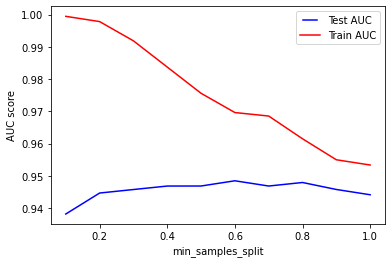

In [89]:
min_samples = 0.1
max_samples = 1.1
n_samples = np.arange(min_samples,max_samples,0.1)
vali_results = []
train_results = []

for samples in n_samples:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=samples, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"min_samples_split: {samples}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_samples, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_samples, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('min_samples_split')
plt.show()

min_samples_leaf: 1, train_accuracy: 0.9712892741061755 ,test_accuracy: 0.9474500587544066
min_samples_leaf: 2, train_accuracy: 0.9756229685807151 ,test_accuracy: 0.9474471210340776
min_samples_leaf: 3, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9474529964747356
min_samples_leaf: 4, train_accuracy: 0.9734561213434453 ,test_accuracy: 0.9474529964747356
min_samples_leaf: 5, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9458254994124559
min_samples_leaf: 6, train_accuracy: 0.9712892741061755 ,test_accuracy: 0.9458254994124559
min_samples_leaf: 7, train_accuracy: 0.9696641386782232 ,test_accuracy: 0.9490775558166863
min_samples_leaf: 8, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9463719153936545
min_samples_leaf: 9, train_accuracy: 0.9702058504875406 ,test_accuracy: 0.9485340775558166


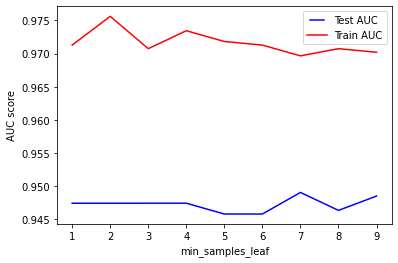

In [90]:
min_leaf = 1
max_leaf = 10
n_leafs = np.arange(min_leaf,max_leaf,1)
vali_results = []
train_results = []

for leaf in n_leafs:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=0.6, min_samples_leaf=leaf, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"min_samples_leaf: {leaf}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_leafs, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_leafs, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('min_samples_leaf')
plt.show()

max_features: 1, train_accuracy: 0.9577464788732394 ,test_accuracy: 0.938786721504113
max_features: 2, train_accuracy: 0.962080173347779 ,test_accuracy: 0.9463689776733256
max_features: 3, train_accuracy: 0.9664138678223185 ,test_accuracy: 0.946918331374853
max_features: 4, train_accuracy: 0.9685807150595883 ,test_accuracy: 0.9490863689776734
max_features: 5, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9447414806110459
max_features: 6, train_accuracy: 0.9712892741061755 ,test_accuracy: 0.9501645123384254
max_features: 7, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9496239717978847
max_features: 8, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9463660399529965
max_features: 9, train_accuracy: 0.9712892741061755 ,test_accuracy: 0.9490775558166862


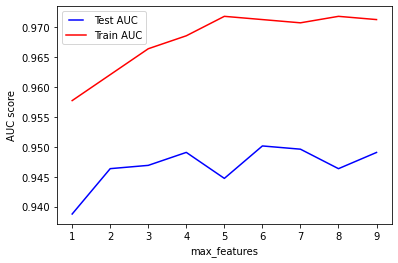

In [92]:
min_features = 1
max_features = 10
n_features = np.arange(min_features,max_features,1)
vali_results = []
train_results = []

for feature in n_features:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=0.6, min_samples_leaf=7, max_features=feature)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"max_features: {feature}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_features, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_features, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('max_features')
plt.show()

# Conclusão dos Testes de Validação

1. Attempt number 1
- n_estimators=39
- learning_rate=0.11
- max_depth=3
- min_samples_split=0.5
- min_samples_leaf=1 Baixa com qualquer valor
- max_features=8
**Acuraccy**: 0.94366

2. Attempt number 2: 
- n_estimators=138
- learning_rate=0.1
- max_depth=8 
- min_samples_split=0.6 
- min_samples_leaf=7 
- max_features=4
**Accuracy**: 0.92957

In [68]:
model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.01, max_depth=0.02, min_samples_split=0.6, min_samples_leaf=0.4, max_features=3)

model.fit(x_train, y_train.values.ravel())

result = model.predict(x_test)

result = pd.DataFrame(data=result)
result.columns = ['Failure']
result.insert(loc=0,column ='Id',value=id_column)

print(f"RESULT: {result}")

result.to_csv(r'result.csv', index = False)

RESULT:             Id  Failure
0    131394910        0
1    131391329        0
2    111345779        0
3    131382288        0
4    131379697        0
..         ...      ...
787  111345889        0
788  111354299        0
789  131389518        0
790  131384425        0
791  131391767        0

[792 rows x 2 columns]
